# Clase 14 - 4/10/2018
(x emilopez)

- Ejercicio de la página 51 del apunte ``05.pdf`` ubicado en el dropbox en ``Estadistica.Aplicada.2018/02_Disenio_Factorial_y_bloques/``
- Usa el archivo ``zincc.csv``
- Tenemos 2 factores

In [1]:
# Ejercicio de la pag. 51/90
datos = read.table("/home/emiliano/EstadisticaAplicada/Estadistica.Aplicada.2018/02_disenio_factorial_y_bloques/datos/zincc.csv", header=TRUE, sep=',')
attach(datos)

ciu = as.factor(ciudad)
x = as.factor(trat)

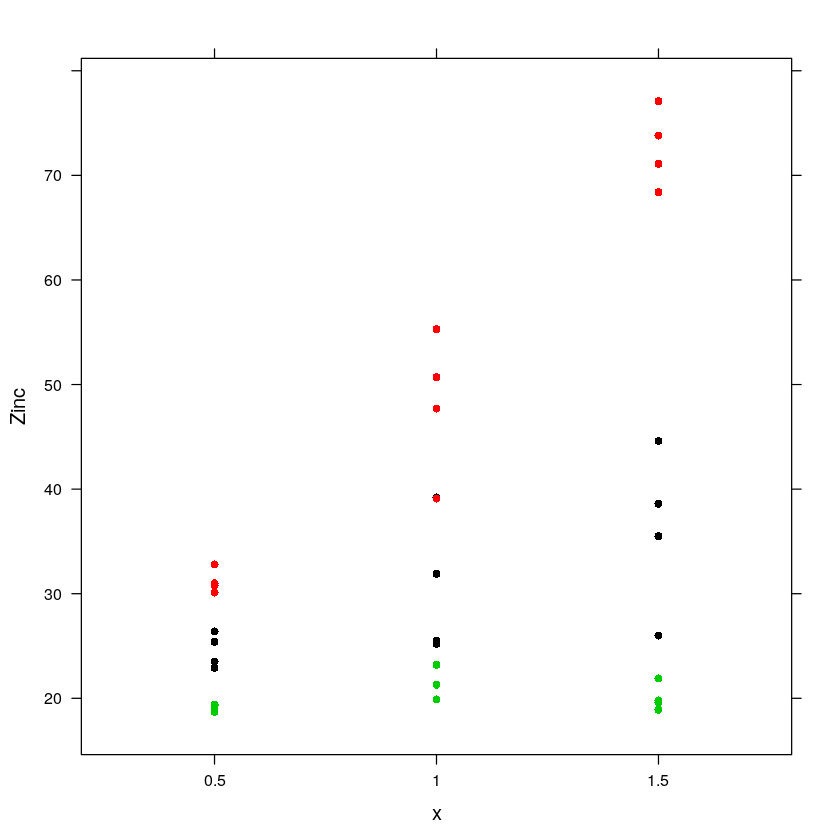

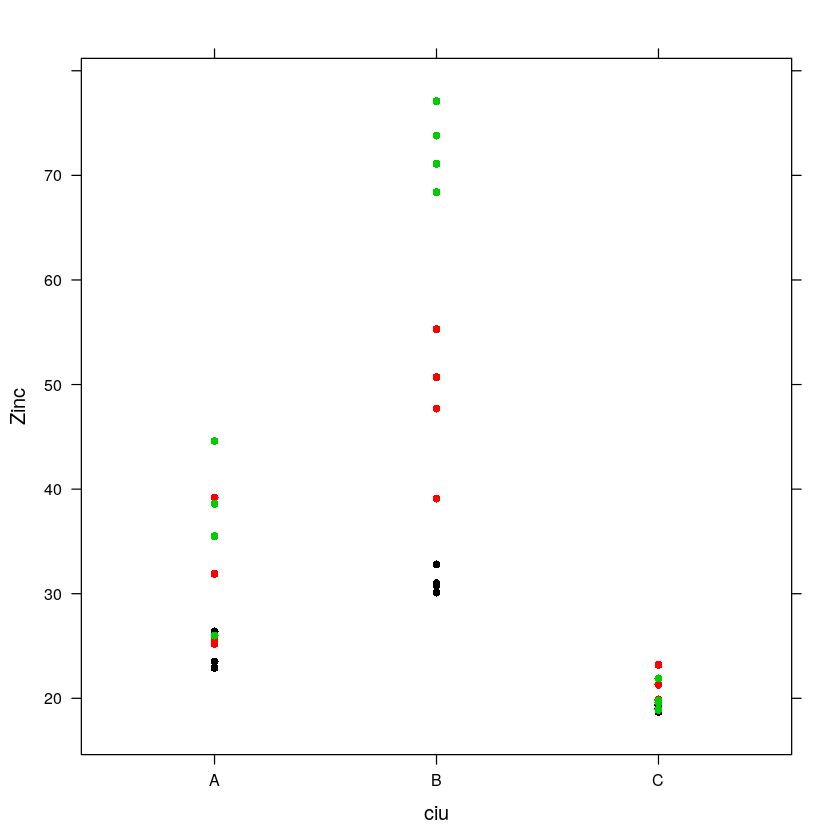

In [2]:
library(lattice)
fig1 = xyplot(Zinc ~x, pch = 16, col = ciu)
print(fig1)

fig2 = xyplot(Zinc ~ciu, pch = 16, col = x)
print(fig2)

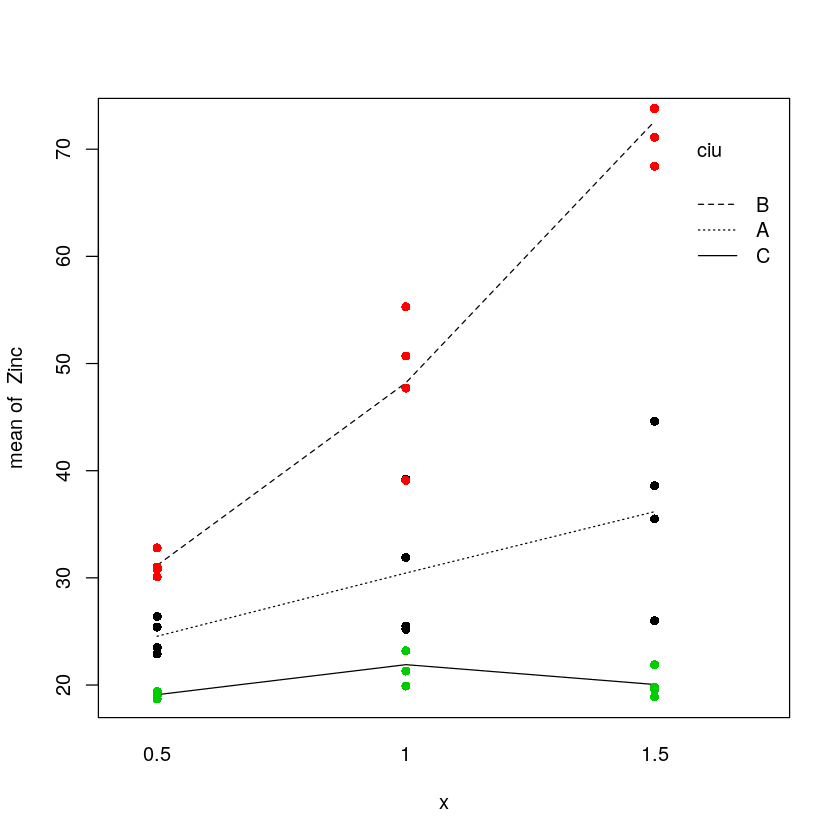

In [3]:
interaction.plot(x,ciu,Zinc)
# con esto vemos los puntos sobre
points(x, Zinc, col=ciu,pch=16)

In [4]:
# parece haber interaccion pero no es muy fuerte, asi que vamos a ver el pvalor
m = aov(Zinc~ciu*x)
summary(m)

            Df Sum Sq Mean Sq F value   Pr(>F)    
ciu          2   5721  2860.3  149.13 2.56e-15 ***
x            2   1945   972.7   50.72 7.18e-10 ***
ciu:x        4   1809   452.3   23.58 1.78e-08 ***
Residuals   27    518    19.2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

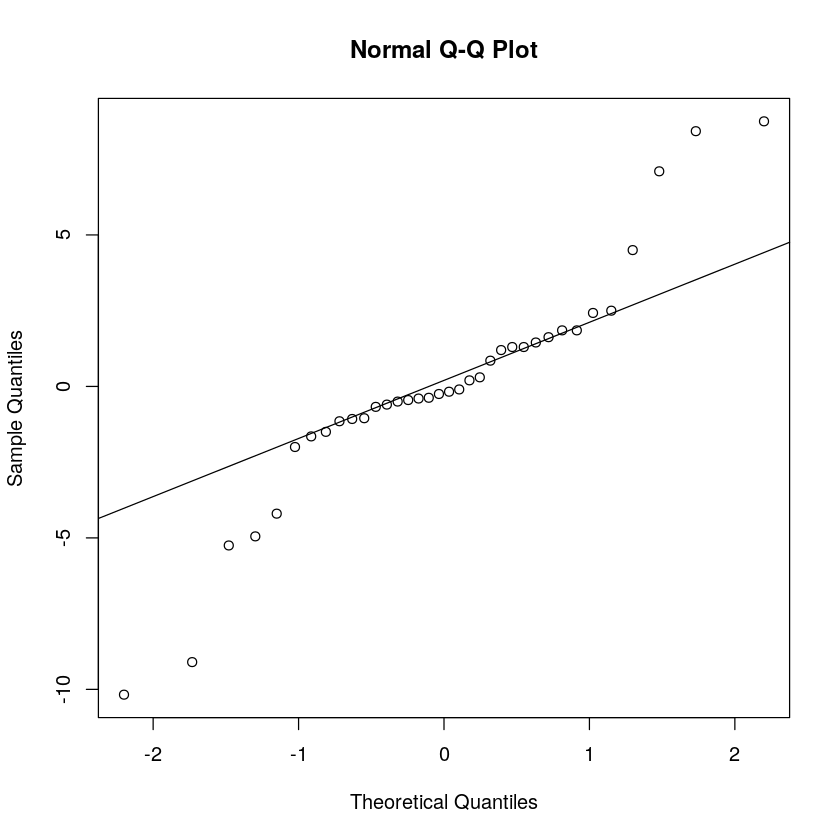

In [5]:
# como vemos que el pvalor es chico, asi que al final sí había interacción y es SIGNIFICATIVA, por eso
# uno no puede confiar solamente en el análisis exploratorio

# ahora veamos residuos, parece bastante feo
qqnorm(m$residuals)
qqline(m$residuals)


	Shapiro-Wilk normality test

data:  m$residuals
W = 0.91479, p-value = 0.008877


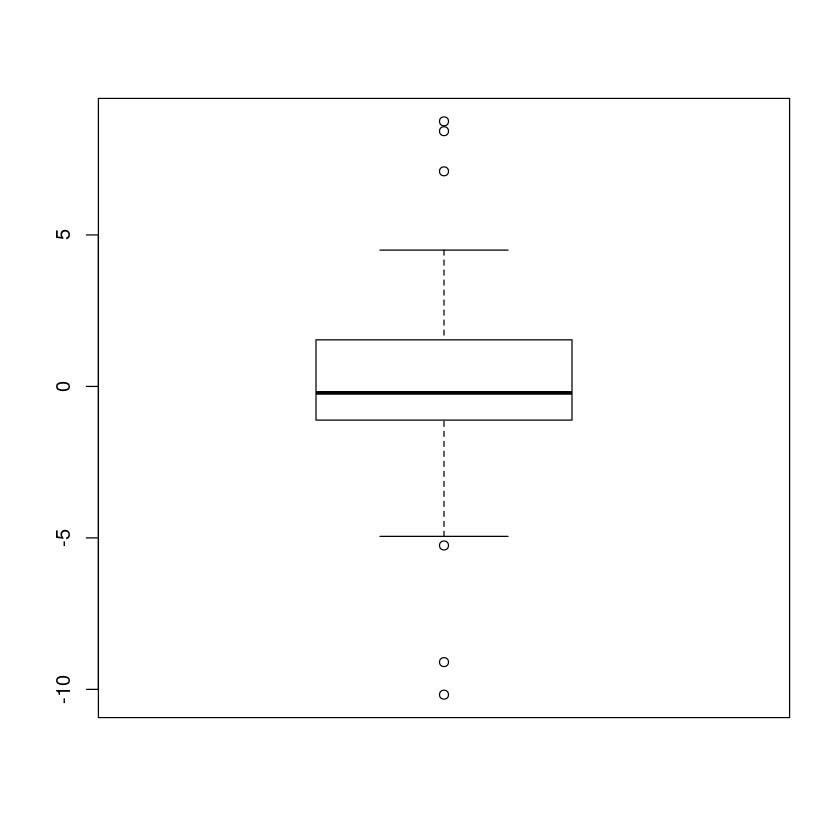

In [6]:
boxplot(m$residuals)
shapiro.test(m$residuals)

In [12]:
# vemos si varianza cte, nop, estamos jodidos, de este analisis en el pvalor no podemos confiar mucho porque aca 
# vemos que las varianzas no son iguales, asi que debemos hacer una transformacion
library(car)
leveneTest(m)

,Df,F value,Pr(>F)
group,8,2.695919,0.02549392
,27,NA,NA


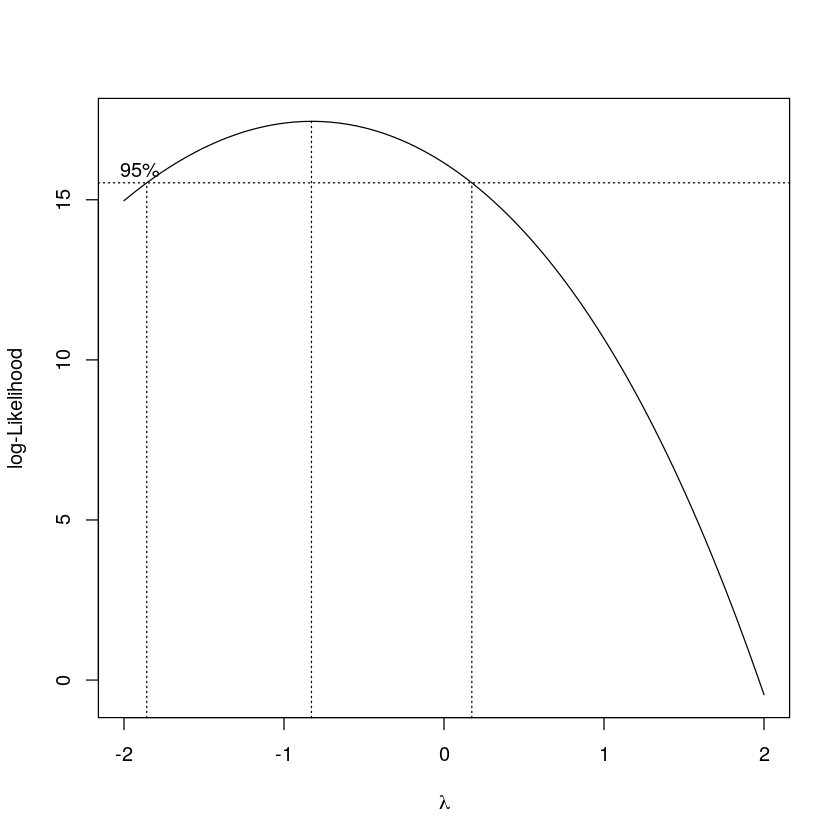

In [13]:
# asi que vamos a transformar
library(MASS)
boxcox(m)

In [14]:
# nuestro nuevo modelo transformado es
m1 = aov(1/Zinc~ciu*x)
summary(m1)

            Df   Sum Sq   Mean Sq F value   Pr(>F)    
ciu          2 0.004415 0.0022077 146.703 3.14e-15 ***
x            2 0.000774 0.0003871  25.725 5.58e-07 ***
ciu:x        4 0.000289 0.0000722   4.796  0.00471 ** 
Residuals   27 0.000406 0.0000150                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [15]:
# el pvalor sigue siendo chico pero es mejor que antes, asi que tb chequeamos residuos nuevamente
shapiro.test(m1$residuals)
leveneTest(m1)
# mejoró un poco, asi que mejor, la varianza me quedó ahí, pero como esta cerca de mi zona de corte lo dejo ahí
# podría elegir otra transformación, esto es según mi criterio


	Shapiro-Wilk normality test

data:  m1$residuals
W = 0.96498, p-value = 0.3047


,Df,F value,Pr(>F)
group,8,2.347387,0.04647148
,27,NA,NA


In [16]:
# no tengo outlier
outlierTest(m1)

No Studentized residuals with Bonferonni p < 0.05
Largest |rstudent|:
  rstudent unadjusted p-value Bonferonni p
9 3.418987          0.0020826     0.074973

In [19]:
# Ahora qué hacemos? podemos estudiar tendencias porque uno de los factores es CUANTITATIVO

# Analisis de tendencia
## asi que creamos contrastes polinomicos de los contrastes que son cuantitativos

# esto me va a redefinir los contrastes descomponiendolos en lineal y cuadrático
contrasts(x) = contr.poly(3) # como estan equispaciado le paso ese 3, sino le deberia pasar los valores de la x

# volvemos a ajustar el modelo

m2 = aov(1/Zinc~ciu*x)
# separamos el efecto para el factor cuantitativo en distintos ordenes a ver cual es su orden
summary.lm(m2) # devolveme el resumen con un modelo de regresion
# ahora lo que quiero ver es la maxima tendencia, quiero ver si la tendencia es cuadratica o me alcanza con la lineal
# pero
# el resultado te dice que necesitas la tendencia lineal solamente, la cuadratica no porque sus pvalores son grandes
# la tendencia lineal no me la puedo sacar de encima porque tengo pvalores chicos


Call:
aov(formula = 1/Zinc ~ ciu * x)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0084289 -0.0018637  0.0000134  0.0011102  0.0097218 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0345154  0.0011198  30.822  < 2e-16 ***
ciuB        -0.0121831  0.0015837  -7.693 2.84e-08 ***
ciuC         0.0148988  0.0015837   9.408 5.18e-10 ***
x.L         -0.0085757  0.0019396  -4.421 0.000144 ***
x.Q          0.0007059  0.0019396   0.364 0.718747    
ciuB:x.L    -0.0043699  0.0027430  -1.593 0.122785    
ciuC:x.L     0.0069193  0.0027430   2.522 0.017853 *  
ciuB:x.Q     0.0008197  0.0027430   0.299 0.767371    
ciuC:x.Q     0.0036575  0.0027430   1.333 0.193554    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.003879 on 27 degrees of freedom
Multiple R-squared:  0.931,	Adjusted R-squared:  0.9105 
F-statistic: 45.51 on 8 and 27 DF,  p-value: 1.079e-13
